In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
TV = pd.read_csv('TVdata.txt')
TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


# Exploration

In [3]:
TV.duplicated().sum()

0

In [4]:
TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

## missing values

In [5]:
TV.drop(columns=['video_id', 'release_year']).describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.95])

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
10%,141.985,3.000,13.000,8.000,0.000,0.000,2.300,62.391,0.000,0.000
25%,351.169,4.000,20.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
95%,14692.834,22.000,48.000,26199.500,12000000.000,8551228.000,7.800,119.131,65.000,2.597
max,307127.606,41.000,70.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


`budget`, `boxoffice` 等有很多是 0，说明有缺值

In [6]:
(TV == 0).sum(axis=0) / TV.shape[0]

video_id                        0.000
cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
import_id                       0.000
release_year                    0.000
genres                          0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
awards                          0.000
mpaa                            0.000
star_category                   0.437
dtype: float64

## cvt_per_day

Text(0, 0.5, 'density')

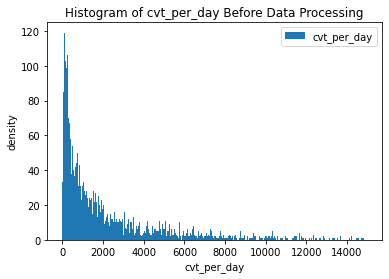

In [7]:
plt.hist(TV['cvt_per_day'], bins=range(0, 15000, 30), label='cvt_per_day')
plt.title('Histogram of cvt_per_day Before Data Processing')
plt.legend()
plt.xlabel('cvt_per_day')
plt.ylabel('density')

## correlation

<AxesSubplot:>

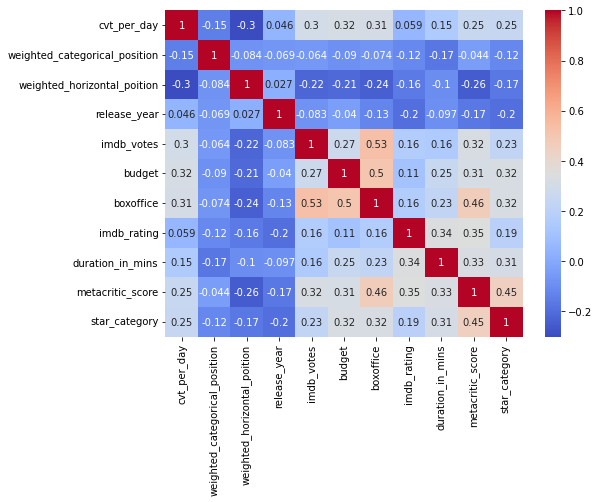

In [8]:
corr = TV.drop(columns=['video_id']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', annot=True)

## categorical

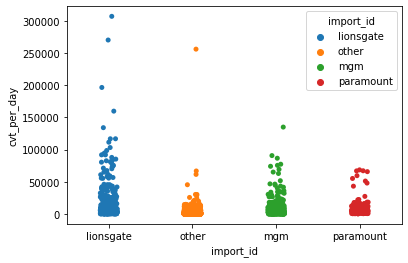

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


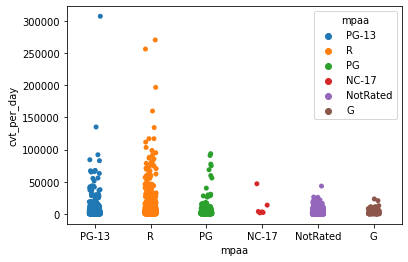

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


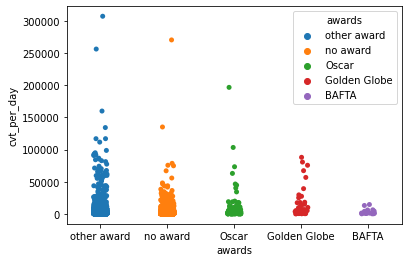

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [9]:
xs = ['import_id', 'mpaa', 'awards']
for x in xs:
    sns.stripplot(data=TV, x=x, y='cvt_per_day', hue=x, jitter=True)
    plt.show()
    print(TV[x].value_counts())

## Genres

In [10]:
TV['genres'].head()

0                            Action,Thriller,Drama
1                            Comedy,Crime,Thriller
2                                      Crime,Drama
3    Thriller,Drama,War,Documentary,Mystery,Action
4               Crime,Thriller,Mystery,Documentary
Name: genres, dtype: object

In [11]:
gen_split = TV['genres'].str.get_dummies(sep=',').sum()
gen_split

Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64

<AxesSubplot:>

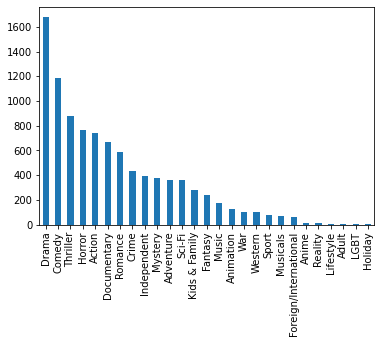

In [12]:
gen_split.sort_values(ascending=False).plot.bar()

## release year

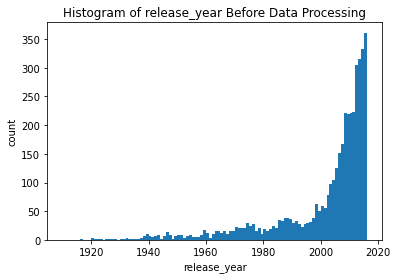

In [13]:
plt.hist(TV['release_year'], bins=range(1910, 2017))
plt.title('Histogram of release_year Before Data Processing')
plt.xlabel('release_year')
plt.ylabel('count')
plt.show()

# Processing

## Categorical Encoding

In [14]:
d_import_id = pd.get_dummies(TV['import_id']).astype(np.int64)
d_mpaa = pd.get_dummies(TV['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(TV['awards']).astype(np.int64)

d_import_id.head()

,lionsgate,mgm,other,paramount
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0


In [15]:
d_genres = TV['genres'].str.get_dummies(sep=',').astype(np.int64)
d_genres.head()

,Action,Adult,Adventure,Animation,Anime,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Holiday,Horror,Independent,Kids & Family,LGBT,Lifestyle,Music,Musicals,Mystery,Reality,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [16]:
# combine rare types
d_genres['Misc'] = d_genres['Anime'] | d_genres['Reality'] | d_genres['Lifestyle'] | d_genres['Adult'] | d_genres['LGBT'] | d_genres['Holiday']
d_genres.drop(columns='Anime Reality Lifestyle Adult LGBT Holiday'.split(), inplace=True)
d_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [17]:
TV['release_year'].quantile(np.linspace(0.1, 0.9, 9))

0.100   1974.000
0.200   1991.000
0.300   2001.000
0.400   2006.000
0.500   2008.000
0.600   2010.000
0.700   2012.000
0.800   2013.000
0.900   2014.000
Name: release_year, dtype: float64

In [18]:
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006', '2006-2008', '2008-2010', '2010-2012', '2012-2013', '2013-2014', '2014-2017']
pd.cut(TV['release_year'], bin_year, labels=year_range).head()

0    2012-2013
1    2012-2013
2    2010-2012
3    2006-2008
4    2012-2013
Name: release_year, dtype: category
Categories (10, object): ['1916-1974' < '1974-1991' < '1991-2001' < '2001-2006' ... '2010-2012' < '2012-2013' < '2013-2014' < '2014-2017']

In [19]:
year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)
d_year.head()

,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [20]:
temp_tv = TV.drop(columns=['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)
newTV = pd.concat([temp_tv, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)
newTV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,1,3,69614,15000000,42930462,6.500,112.301,51,1.710,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,1,3,46705,15000000,3301046,6.500,94.983,41,3.250,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,1,3,197596,26000000,37397291,7.300,115.764,58,2.647,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,3,4,356339,15000000,15700000,7.600,130.704,94,1.667,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,1,3,46720,27220000,8551228,6.400,105.546,37,3.067,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## Missing Data

In [21]:
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
newTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     3882 non-null   float64
 5   budget                         1772 non-null   float64
 6   boxoffice                      1032 non-null   float64
 7   imdb_rating                    3882 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               1214 non-null   float64
 10  star_category                  2380 non-null   float64
 11  lionsgate                      4226 non-null   int64  
 12  mgm                            4226 non-null   i

In [22]:
newTV1 = newTV.copy()
for col in ['boxoffice', 'metacritic_score', 'star_category', 'imdb_votes', 'imdb_rating', 'budget']:
    newTV1[col] = newTV1[col].fillna(newTV1[col].mean())

## Scaling

In [23]:
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget', 'boxoffice','imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_sc = newTV1.copy()
scaler = preprocessing.StandardScaler().fit(newTV_sc[scale_lst])
newTV_sc[scale_lst] = scaler.transform(newTV_sc[scale_lst])
newTV_sc.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,0.033,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,3.434,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,2.102,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,-0.063,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,3.029,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Model Training

In [24]:
train, test = train_test_split(newTV_sc, test_size=0.15, random_state=3)
model_train_x = train.drop(['video_id', 'cvt_per_day'], axis=1)
model_test_x = test.drop(['video_id', 'cvt_per_day'], axis=1)
model_train_y = train['cvt_per_day']
model_test_y = test['cvt_per_day']

## Lasso Linear Regression

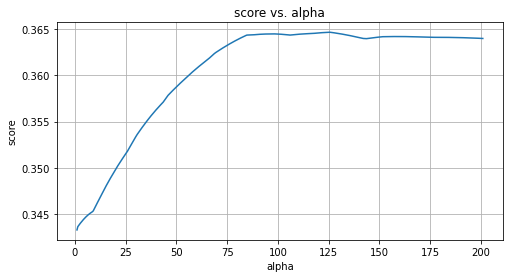

The optimaized alpha = 125.64929859719439, score of Lasso linear = 0.3646194368519905


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score #not used

lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state=0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis=1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis=1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.linspace(1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = -np.inf
max_score = -np.inf
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso #optional code

plt.figure(figsize=(8, 4))
plt.plot(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a
print(f'The optimaized alpha = {opt_a}, score of Lasso linear = {max_score}')

In [26]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(alpha=opt_a)
lasso_f.fit(model_train_x, model_train_y)

Lasso(alpha=125.64929859719439)

## Ridge Linear Regression

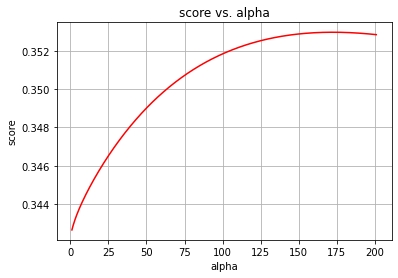

The optimaized alpha = 172.5430861723447, score of Ridge linear = 0.35297269940665443


In [27]:
# Use the same training data set as Lasso (linear features)
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)

alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = -np.inf
max_score = -np.inf
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge #optional code
plt.plot(alphas, scores, color='r')
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model3_para = opt_a
print(f'The optimaized alpha = {opt_a}, score of Ridge linear = {max_score}')

In [28]:
# add the 15% validate data, use the optimal alpha, re-train the model
ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

Ridge(alpha=172.5430861723447)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=2,max_features='sqrt')

max_depth = [15,16,17,18,19,20,21]   
n_estimators = [55,56,57,58,59,60,61,62,63,64,65] 
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
clf.fit(model_train_x, model_train_y)

In [ ]:
result = clf.cv_results_
result

In [ ]:
scores = clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators))
for i, j in enumerate(max_depth):
    plt.plot(n_estimators,scores[i],'-o',label=f'max_depths is: {j}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
print(f"the best parameter for max_depth is: {clf.best_params_['max_depth']}")
print(f"the best parameter for n_estimators is: {clf.best_params_['n_estimators']}")

# Model Evaluation

In [ ]:
train_x = model_train_x
train_y = model_train_y
test_x = model_test_x
test_y = model_test_y

## Lasso

In [ ]:
from sklearn.metrics import mean_squared_error

pred_y = lasso_f.predict(test_x)
lasso_score = lasso_f.score(test_x, test_y)
MSE_lasso = mean_squared_error(test_y, pred_y)
RMSE_lasso = np.sqrt(MSE_lasso)
print('lasso score:', lasso_score)
print('Mean square error of lasso: ', MSE_lasso)
print('Root mean squared error of lasso:', RMSE_lasso)

## Ridge

In [ ]:
pred_y = ridge.predict(test_x)
ridge_score = ridge_f.score(test_x,test_y)
MSE_ridge = mean_squared_error(test_y, pred_y)
RMSE_ridge = np.sqrt(MSE_ridge)
print('ridge score:', ridge_score)
print('Mean square error of ridge:', MSE_ridge)
print('Root mean squared error of ridge:', RMSE_ridge)

## Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth'], max_features='sqrt', random_state=2, n_jobs=-1)
rf.fit(train_x,train_y)
pred_y = rf.predict(test_x)
rf_score = rf.score(test_x,test_y)
MSE_rf = mean_squared_error(test_y,pred_y)
RMSE_rf = np.sqrt(MSE_rf)
print('rf score:', rf_score)
print('Mean square error of rf:', MSE_rf)
print('Root mean squared error of rf:', RMSE_rf)

# Model Comparison

In [ ]:
lst_score = [lasso_score, ridge_score, rf_score]
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_ridge, RMSE_rf]
model_lst = ['Lasso_linear', 'Ridge linear', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)

# Feature Importance

In [ ]:
importances = rf.feature_importances_
feature_name = train_x.columns.values
indices = np.argsort(importances)[::-1]
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()